### Step 5 – Artificial Neural Network (Feedforward)

1. Create and train a **fully connected feedforward Artificial Neural Network (ANN)** to classify the two true classes.  
2. Plot the **decision boundary** of the ANN and compare it with the one obtained using Logistic Regression.  
3. Compute the performance metrics: **accuracy, precision, recall, F1-score**.
***

### ⚙️ When to Use an Artificial Neural Network (ANN)

- ✅ Use it when:
  - The decision boundary is **non-linear/complex** and simpler linear models underfit.
  - You need **flexibility** and universal function approximation.
  - Inputs are **numeric and standardized**, and you can tune hyperparameters.

- 🚫 Avoid it when:
  - The dataset is **small** and nearly **linearly separable** (Logistic Regression is simpler and more interpretable).
  - You need **strong explainability** or have tight compute constraints.
  - Features are **not scaled** or mostly **categorical** without proper encoding.
***

In [1]:
%run 00-setup.py

In [2]:
from ml.viz import scatter_mlp
from ml.data import load_dataset
from tasks.ann import fit_ann, evaluate_ann

In [3]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

In [ ]:
res = fit_ann(
    X, y,
    hidden_layers=(2,),
    activation="relu",
    learning_rate_init=0.01,
    alpha=0.001,
    max_iter=1500,
    seed=42
)

In [5]:
metrics = evaluate_ann(y, res["y_pred"])

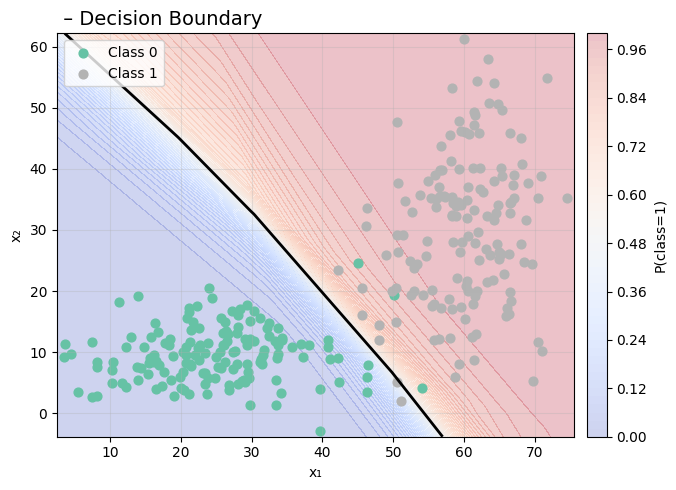

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'left': ' – Decision Boundary'}, xlabel='x₁', ylabel='x₂'>)

In [6]:
scatter_mlp(res["model"], X, y)

In [7]:
print("Metrics:", metrics)

Metrics: {'accuracy': 0.9833333333333333, 'precision': 0.9801324503311258, 'recall': 0.9866666666666667, 'f1': 0.9833887043189369}
